In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the stock price data
data = pd.read_csv("AXISBANK.csv")
data = {"Open": 10.5, "High": 11.2, "Low": 10.1}["Close"]  # Example data dictionary


# Scale the data
data = data / data.max()

# Split the data into train and test sets
train_data = data[:-100]
test_data = data[-100:]

# Create the LSTM model
model = Sequential()
model.add(LSTM(128, activation="tanh", input_shape=(1, 1)))
model.add(Dense(1, activation="linear"))

# Train the model
model.compile(loss="mse", optimizer="adam")
model.fit(train_data, train_data, epochs=100)

# Predict the test data
predictions = model.predict(test_data)

# Plot the predictions
plt.plot(test_data, label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.show()


KeyError: 'Close'

Epoch 1/100
163/163 [==============================] - 10s 6ms/step - loss: 0.0281
Epoch 2/100
163/163 [==============================] - 1s 5ms/step - loss: 6.5101e-04
Epoch 3/100
163/163 [==============================] - 1s 5ms/step - loss: 4.3642e-05
Epoch 4/100
163/163 [==============================] - 1s 5ms/step - loss: 3.7241e-05
Epoch 5/100
163/163 [==============================] - 1s 5ms/step - loss: 3.1049e-05
Epoch 6/100
163/163 [==============================] - 1s 5ms/step - loss: 2.4811e-05
Epoch 7/100
163/163 [==============================] - 1s 5ms/step - loss: 1.8899e-05
Epoch 8/100
163/163 [==============================] - 1s 6ms/step - loss: 1.3776e-05
Epoch 9/100
163/163 [==============================] - 1s 6ms/step - loss: 9.7049e-06
Epoch 10/100
163/163 [==============================] - 1s 5ms/step - loss: 6.3024e-06
Epoch 11/100
163/163 [==============================] - 1s 5ms/step - loss: 3.8600e-06
Epoch 12/100
163/163 [==============================] -

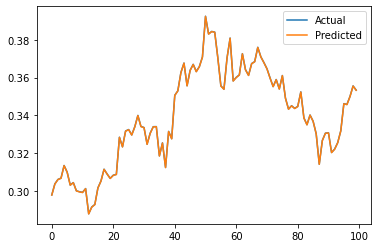

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the stock price data
data = pd.read_csv("AXISBANK.csv")

# Scale the data
data["Close"] = data["Close"] / data["Close"].max()

# Split the data into train and test sets
train_data = data["Close"][:-100]
test_data = data["Close"][-100:]

# Reshape the data for LSTM input
train_data = np.reshape(train_data.values, (len(train_data), 1, 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(128, activation="tanh", input_shape=(1, 1)))
model.add(Dense(1, activation="linear"))

# Train the model
model.compile(loss="mse", optimizer="adam")
model.fit(train_data, train_data, epochs=100)

# Reshape the test data for prediction
test_data = np.reshape(test_data.values, (len(test_data), 1, 1))

# Predict the test data
predictions = model.predict(test_data)

# Plot the predictions
plt.plot(test_data.reshape(-1), label="Actual")
plt.plot(predictions.reshape(-1), label="Predicted")
plt.legend()
plt.show()


Epoch 1/100
163/163 [==============================] - 8s 5ms/step - loss: 0.0277
Epoch 2/100
163/163 [==============================] - 1s 5ms/step - loss: 6.7382e-04
Epoch 3/100
163/163 [==============================] - 1s 6ms/step - loss: 4.2606e-05
Epoch 4/100
163/163 [==============================] - 1s 5ms/step - loss: 3.6167e-05
Epoch 5/100
163/163 [==============================] - 1s 6ms/step - loss: 3.0095e-05
Epoch 6/100
163/163 [==============================] - 1s 6ms/step - loss: 2.4039e-05
Epoch 7/100
163/163 [==============================] - 1s 4ms/step - loss: 1.8483e-05
Epoch 8/100
163/163 [==============================] - 1s 9ms/step - loss: 1.3532e-05
Epoch 9/100
163/163 [==============================] - 1s 6ms/step - loss: 9.4082e-06
Epoch 10/100
163/163 [==============================] - 1s 6ms/step - loss: 6.0674e-06
Epoch 11/100
163/163 [==============================] - 1s 6ms/step - loss: 3.7024e-06
Epoch 12/100
163/163 [==============================] - 

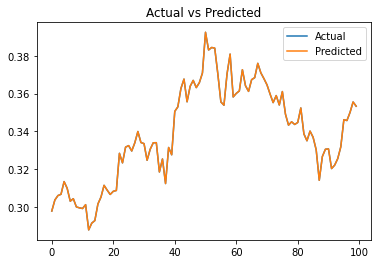

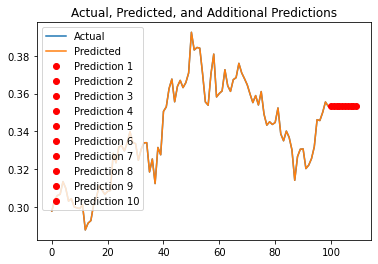

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the stock price data
data = pd.read_csv("AXISBANK.csv")

# Scale the data
data["Close"] = data["Close"] / data["Close"].max()

# Split the data into train and test sets
train_data = data["Close"][:-100]
test_data = data["Close"][-100:]

# Reshape the data for LSTM input
train_data = np.reshape(train_data.values, (len(train_data), 1, 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(128, activation="tanh", input_shape=(1, 1)))
model.add(Dense(1, activation="linear"))

# Train the model
model.compile(loss="mse", optimizer="adam")
model.fit(train_data, train_data, epochs=100)

# Reshape the test data for prediction
test_data = np.reshape(test_data.values, (len(test_data), 1, 1))

# Predict the test data
predictions = model.predict(test_data)

# Generate additional predictions
num_predictions = 10  # Number of additional predictions to generate
additional_predictions = []

# Use the last prediction as the initial input for generating subsequent predictions
input_data = np.reshape(predictions[-1], (1, 1, 1))

for _ in range(num_predictions):
    # Generate the next prediction
    next_prediction = model.predict(input_data)
    additional_predictions.append(next_prediction)

    # Update the input data for the next iteration
    input_data = np.reshape(next_prediction, (1, 1, 1))

# Plot the actual and predicted values
plt.plot(test_data.reshape(-1), label="Actual")
plt.plot(predictions.reshape(-1), label="Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

# Plot the additional predictions
plt.plot(test_data.reshape(-1), label="Actual")
plt.plot(predictions.reshape(-1), label="Predicted")
for i, pred in enumerate(additional_predictions):
    plt.plot([len(predictions) + i], pred, 'ro', label=f"Prediction {i+1}")
plt.title("Actual, Predicted, and Additional Predictions")
plt.legend()
plt.show()


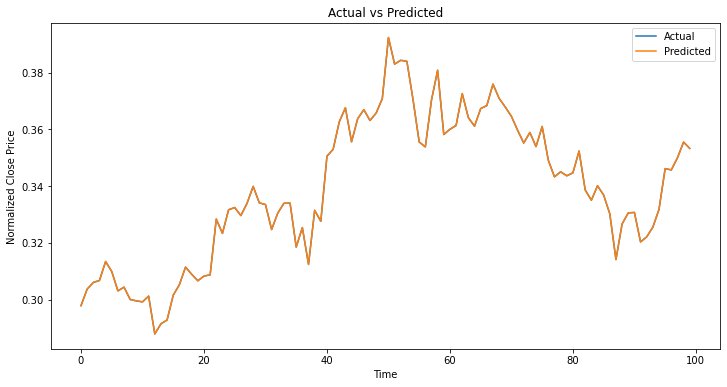

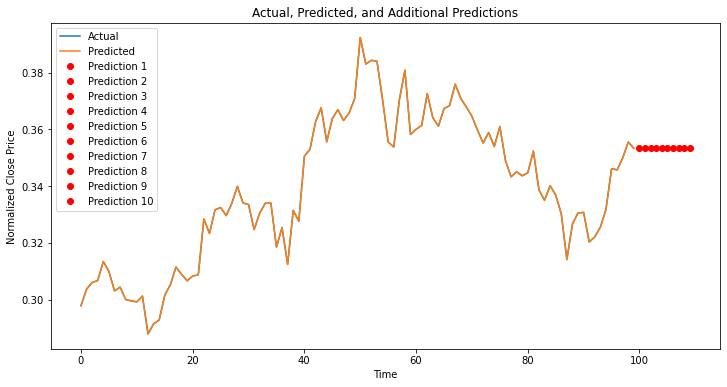

In [8]:
# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.reshape(-1), label="Actual")
plt.plot(predictions.reshape(-1), label="Predicted")
plt.title("Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Normalized Close Price")
plt.legend()
plt.show()

# Plot the additional predictions
plt.figure(figsize=(12, 6))
plt.plot(test_data.reshape(-1), label="Actual")
plt.plot(predictions.reshape(-1), label="Predicted")
for i, pred in enumerate(additional_predictions):
    plt.plot([len(predictions) + i], pred, 'ro', label=f"Prediction {i+1}")
plt.title("Actual, Predicted, and Additional Predictions")
plt.xlabel("Time")
plt.ylabel("Normalized Close Price")
plt.legend()
plt.show()
#In this updated code, the plots are customized to include labels for the axes and a larger figure size for better visualization. The x-axis represents time, while the y-axis represents the normalized close price. The first plot displays the actual and predicted values, while the second plot includes the additional predictions as well.

#Feel free to adjust the figure size and the axis labels based on your preferences.








Epoch 1/10
133/133 [==============================] - 8s 16ms/step - loss: 0.0104
Epoch 2/10
133/133 [==============================] - 2s 15ms/step - loss: 0.0011
Epoch 3/10
133/133 [==============================] - 2s 15ms/step - loss: 0.0012
Epoch 4/10
133/133 [==============================] - 2s 14ms/step - loss: 9.7659e-04
Epoch 5/10
133/133 [==============================] - 2s 18ms/step - loss: 9.1314e-04
Epoch 6/10
133/133 [==============================] - 2s 17ms/step - loss: 8.4678e-04
Epoch 7/10
133/133 [==============================] - 2s 15ms/step - loss: 8.1322e-04
Epoch 8/10
133/133 [==============================] - 2s 14ms/step - loss: 7.0609e-04
Epoch 9/10
133/133 [==============================] - 2s 13ms/step - loss: 6.5386e-04
Epoch 10/10
33/33 [==============================] - 1s 6ms/step


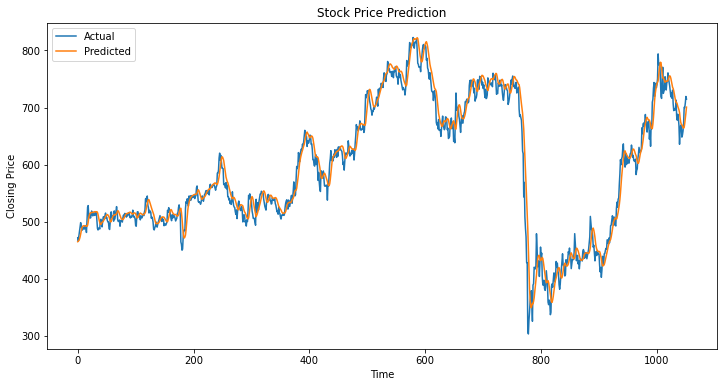

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the stock price data
data = pd.read_csv("AXISBANK.csv")

# Extract the closing prices
close_prices = data["Close"].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

# Split the data into train and test sets
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

# Prepare the training data
X_train = []
y_train = []
for i in range(10, len(train_data)):
    X_train.append(train_data[i-10:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

# Compile and train the model
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Prepare the test data
X_test = []
y_test = close_prices[train_size+10:]  # Actual prices for evaluation
for i in range(len(test_data) - 10):
    X_test.append(test_data[i:i+10, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.legend()
plt.show()


In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the stock price data
data = pd.read_csv("AXISBANK.csv")

# Extract the closing prices
close_prices = data["Close"].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

# Prepare the data for LSTM
X = []
y = []
lookback = 10  # Number of previous time steps to consider for prediction

for i in range(lookback, len(scaled_prices)):
    X.append(scaled_prices[i - lookback:i, 0])
    y.append(scaled_prices[i, 0])

X = np.array(X)
y = np.array(y)

# Reshape the input data for LSTM (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Create and train the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(lookback, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(X, y, epochs=10, batch_size=32)

# Use the model to predict future stock prices
num_predictions = 10  # Number of future predictions to make
last_sequence = X[-1]  # Last sequence in the data

future_predictions = []

for _ in range(num_predictions):
    next_prediction = model.predict(last_sequence.reshape(1, lookback, 1))
    future_predictions.append(next_prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], next_prediction[0, 0])

# Inverse scale the predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

print("Future Predictions:")
for i, prediction in enumerate(future_predictions):
    print(f"Prediction {i+1}: {prediction[0]}")


Epoch 1/10
166/166 [==============================] - 12s 17ms/step - loss: 0.0056
Epoch 2/10
166/166 [==============================] - 3s 16ms/step - loss: 8.4498e-04
Epoch 3/10
166/166 [==============================] - 2s 14ms/step - loss: 8.1671e-04
Epoch 4/10
166/166 [==============================] - 2s 13ms/step - loss: 7.2359e-04
Epoch 5/10
166/166 [==============================] - 2s 14ms/step - loss: 6.2428e-04
Epoch 6/10
166/166 [==============================] - 2s 13ms/step - loss: 6.1177e-04
Epoch 7/10
166/166 [==============================] - 2s 13ms/step - loss: 5.5057e-04
Epoch 8/10
166/166 [==============================] - 2s 13ms/step - loss: 4.7850e-04
Epoch 9/10
166/166 [==============================] - 2s 13ms/step - loss: 3.9824e-04
Epoch 10/10
1/1 [==============================] - 0s 32ms/step
Future Predictions:
Prediction 1: 688.345703125
Prediction 2: 689.7564697265625
Prediction 3: 687.4808349609375
Prediction 4: 683.16796875
Prediction 5: 678.03637695

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

# Define the data
data = pd.read_csv("AXISBANK.csv")

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# The tech stocks we'll use for this analysis
tech_list = ['Open', 'High', 'Low', 'Close']

# Subset the data for the selected tech stocks
df = data.loc[:, tech_list]

# Rename the columns with more meaningful names
df.columns = ["Open", "High", "Low", "Close"]

df.tail(10)


,Open,High,Low,Close
Date,,,,
2021-04-16,668.65,675.25,662.35,669.20
2021-04-19,650.00,655.30,631.00,648.15
2021-04-20,656.00,662.00,643.00,651.75
2021-04-22,641.00,660.95,634.40,658.70
2021-04-23,656.00,677.50,650.90,671.35
2021-04-26,694.00,703.80,684.50,700.45
2021-04-27,691.10,703.90,684.10,699.55
2021-04-28,708.00,712.50,688.15,708.15
2021-04-29,712.00,726.90,707.00,719.40


In [12]:
# Summary statistics for your data
data_stats = data.describe()
print(data_stats)


        Prev Close         Open         High          Low         Last  \
count  5306.000000  5306.000000  5306.000000  5306.000000  5306.000000   
mean    585.763852   586.507388   596.476187   575.571598   585.897399   
std     436.714128   436.602194   443.044833   430.108921   436.609147   
min      22.150000    21.000000    23.700000    21.000000    22.150000   
25%     230.950000   232.000000   235.125000   227.075000   230.550000   
50%     519.450000   520.100000   528.400000   512.025000   519.425000   
75%     877.312500   880.075000   897.987500   852.762500   877.275000   
max    2023.350000  2034.400000  2043.050000  2002.600000  2022.550000   

             Close         VWAP        Volume      Turnover         Trades  \
count  5306.000000  5306.000000  5.306000e+03  5.306000e+03    2456.000000   
mean    585.893931   586.077778  4.527938e+06  2.739871e+14  120602.231678   
std     436.649765   436.611987  8.101940e+06  4.122431e+14   96106.654046   
min      22.150000   

In [13]:
data_info=data.info
print(data_info)

<bound method DataFrame.info of               Symbol Series  Prev Close   Open    High     Low    Last  \
Date                                                                     
2000-01-03   UTIBANK     EQ       24.70   26.7   26.70   26.70   26.70   
2000-01-04   UTIBANK     EQ       26.70   27.0   28.70   26.50   27.00   
2000-01-05   UTIBANK     EQ       26.85   26.0   27.75   25.50   26.40   
2000-01-06   UTIBANK     EQ       26.30   25.8   27.00   25.80   25.90   
2000-01-07   UTIBANK     EQ       25.95   25.0   26.00   24.25   25.00   
...              ...    ...         ...    ...     ...     ...     ...   
2021-04-26  AXISBANK     EQ      671.35  694.0  703.80  684.50  699.50   
2021-04-27  AXISBANK     EQ      700.45  691.1  703.90  684.10  700.90   
2021-04-28  AXISBANK     EQ      699.55  708.0  712.50  688.15  705.95   
2021-04-29  AXISBANK     EQ      708.15  712.0  726.90  707.00  717.10   
2021-04-30  AXISBANK     EQ      719.40  705.0  729.85  705.00  711.65   

     